In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice
from smart_plotters import cmd_plot

#import importlib as imp

#imp.reload(cmd_plot)

In [2]:
cat_use = make_cat_use()


# RC Selection

(0.0, 3.0)

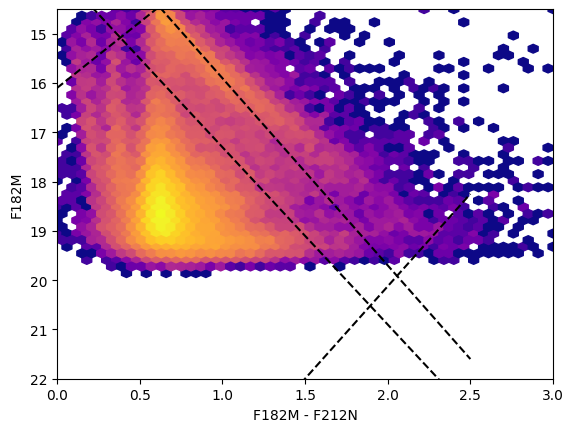

In [ ]:
plt.hexbin(cat_use.color('f182m', 'f212n'), cat_use.band('f182m'), extent=(0, 3, 14.5, 22), mincnt=1, gridsize=50, cmap='plasma', bins='log')
x = np.linspace(0, 2.5, 10)
pt1 = (0.5, 14)
pt2 = (2.0, 19.7)
y = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
plt.plot(x, y, color='k', linestyle='dashed')

pt1 = (0.5, 15.5)
pt2 = (2.0, 20.9)
y = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
plt.plot(x, y, color='k', linestyle='dashed')

pt1 = (0.3, 15.3)
pt2 = (0.6, 14.5)
y = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
plt.plot(x, y, color='k', linestyle='dashed')

pt1 = (1.9, 20.5)
pt2 = (1.5, 22)
y = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
plt.plot(x, y, color='k', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel('F182M - F212N')
plt.ylabel('F182M')
plt.ylim(22, 14.5)
plt.xlim(0, 3)

(0.0, 3.0)

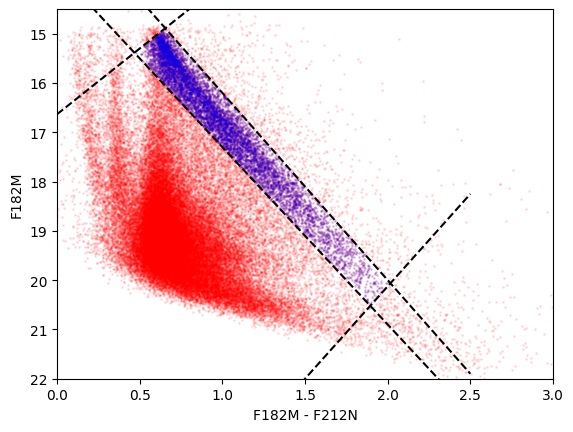

In [4]:
#plt.hexbin(cat_use.color('f182m', 'f212n'), cat_use.band('f182m'), extent=(0, 3, 14.5, 22), mincnt=1, gridsize=50, cmap='plasma', bins='log')

cat_use.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='r')

x = np.linspace(0, 2.5, 10)

pt1 = (0.5, 14.3)
pt2 = (2.0, 20.)
y1 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
mask_below_y1 = cat_use.band('f182m') > ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat_use.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
plt.plot(x, y1, color='k', linestyle='dashed')

pt1 = (0.5, 15.5)
pt2 = (2.0, 20.9)
y2 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
mask_above_y2 = cat_use.band('f182m') < ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat_use.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
mask_inbox = mask_below_y1 & mask_above_y2
plt.plot(x, y2, color='k', linestyle='dashed')

pt1 = (0.5, 15.3)
pt2 = (0.8, 14.5)
y3 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
mask_below_y3 = cat_use.band('f182m') > ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat_use.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
mask_inbox = mask_inbox & mask_below_y3
plt.plot(x, y3, color='k', linestyle='dashed')

pt1 = (1.9, 20.5)
pt2 = (1.5, 22)
y4 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
mask_above_y4 = cat_use.band('f182m') < ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat_use.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
mask_inbox = mask_inbox & mask_above_y4
plt.plot(x, y4, color='k', linestyle='dashed')


cat_inbox = JWSTCatalog(cat_use.catalog[mask_inbox])
cat_inbox.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='blue')

plt.gca().invert_yaxis()
plt.xlabel('F182M - F212N')
plt.ylabel('F182M')
plt.ylim(22, 14.5)
plt.xlim(0, 3)

In [5]:
cat_inbox.catalog['Av'] = cat_inbox.get_Av('f182m', 'f212n')

In [6]:
fn = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
hdu = fits.open(fn)
ww = WCS(hdu['SCI'].header)
nanfield = np.nan * hdu['SCI'].data

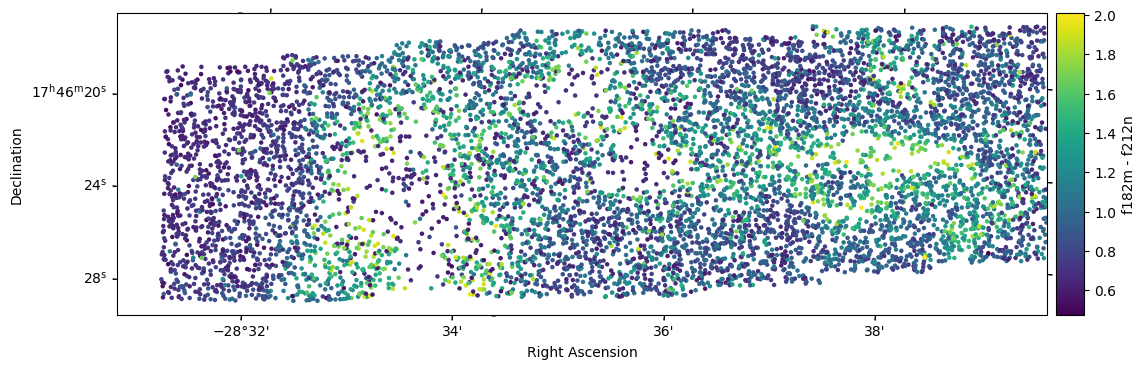

In [7]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ww)
ax.imshow(nanfield)
cat_inbox.plot_position(s=5, c=cat_inbox.color('f182m', 'f212n'), cmap='viridis', transform=ax.get_transform('world'))
cax = ax.inset_axes([1.01, 0., 0.03, 1])
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='f182m - f212n')
#cax = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='f182m - f212n')


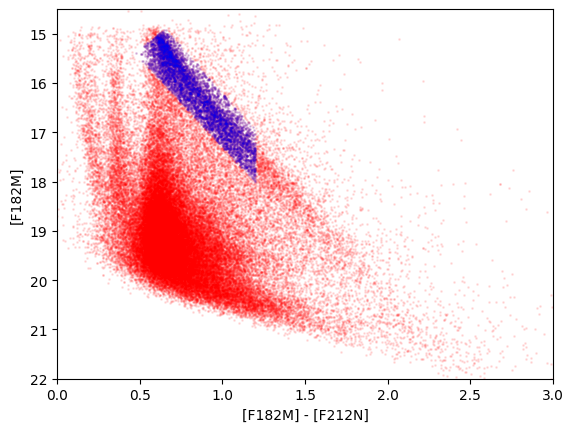

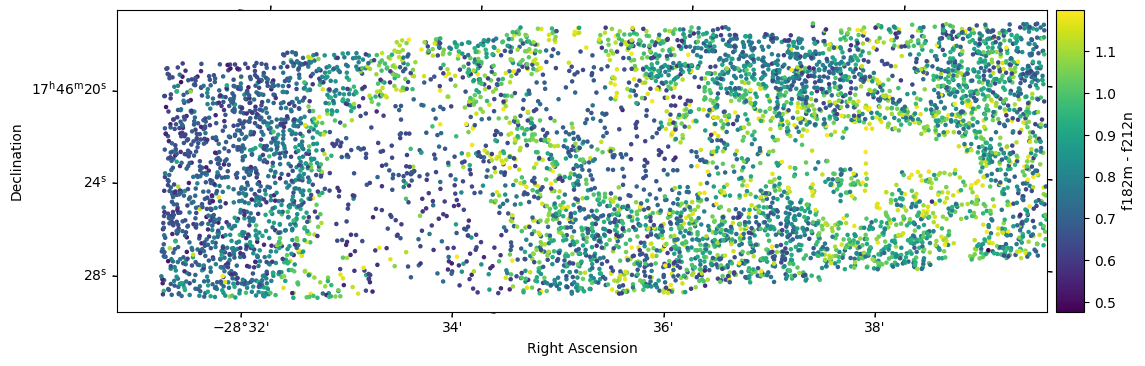

In [8]:
mask_blue = cat_inbox.color('f182m', 'f212n') < 1.2
cat_inbox_blue = JWSTCatalog(cat_inbox.catalog[mask_blue])

cat_use.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='r')
cat_inbox_blue.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='blue')
plt.gca().invert_yaxis()
plt.ylim(22, 14.5)
plt.xlim(0, 3)
plt.show()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ww)
ax.imshow(nanfield)
cat_inbox_blue.plot_position(s=5, c=cat_inbox_blue.color('f182m', 'f212n'), cmap='viridis', transform=ax.get_transform('world'))
cax = ax.inset_axes([1.01, 0., 0.03, 1])
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='f182m - f212n')
#cax = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='f182m - f212n')


## Refining Selection to the most sure stars

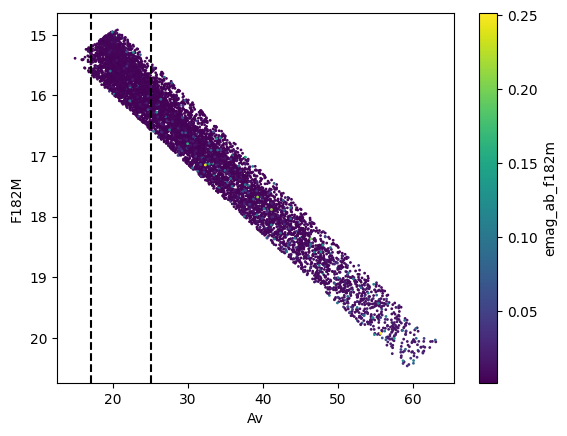

In [52]:
#cat_inbox.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, cmap='viridis', c=cat_inbox.catalog['Av'])

im = plt.scatter(cat_inbox.catalog['Av'], cat_inbox.band('f182m'), s=1, c=cat_inbox.catalog['emag_ab_f182m'], cmap='viridis')
plt.xlabel('Av')
plt.ylabel('F182M')
plt.gca().invert_yaxis()
plt.colorbar(im, label='emag_ab_f182m')
plt.axvline(17, color='k', linestyle='dashed')
plt.axvline(25, color='k', linestyle='dashed')
plt.show()

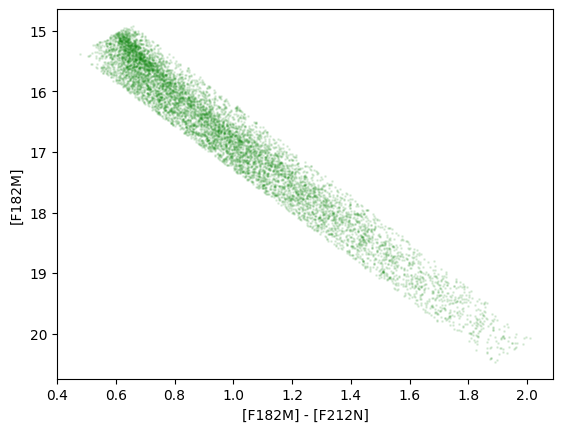

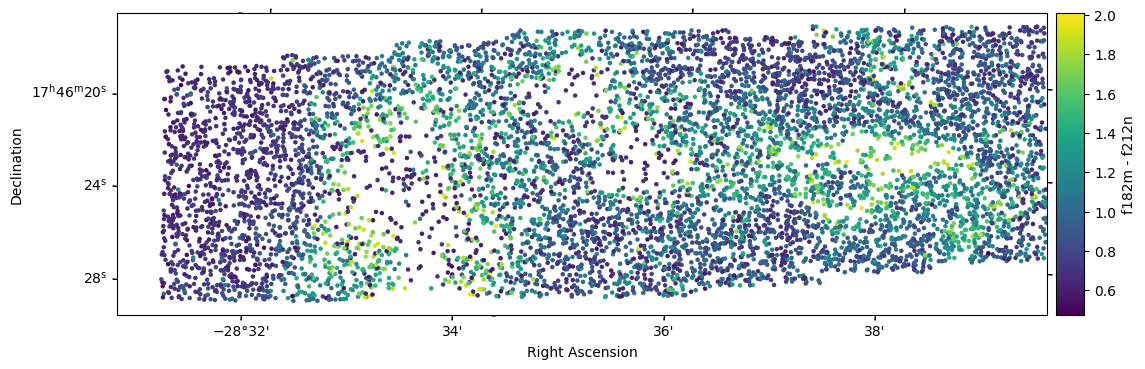

In [10]:
cat_inbox_lowE = JWSTCatalog(cat_inbox.catalog[cat_inbox.catalog['emag_ab_f182m'] < 0.05])
cat_inbox_lowE.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='green')
plt.show()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ww)
ax.imshow(nanfield)
cat_inbox_lowE.plot_position(s=5, c=cat_inbox_lowE.color('f182m', 'f212n'), cmap='viridis', transform=ax.get_transform('world'))
cax = ax.inset_axes([1.01, 0., 0.03, 1])
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='f182m - f212n')

# Region Selection

In [11]:
reg_f = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/filament_short.region')
reg_c1 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc1.region')
reg_c2 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc2.region')
reg_d = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudd.region')

reg_c1_ice = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudc1_ice.reg')
reg_c2_ice = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudc2_ice.reg')
reg_d_ice = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudd_ice.reg')

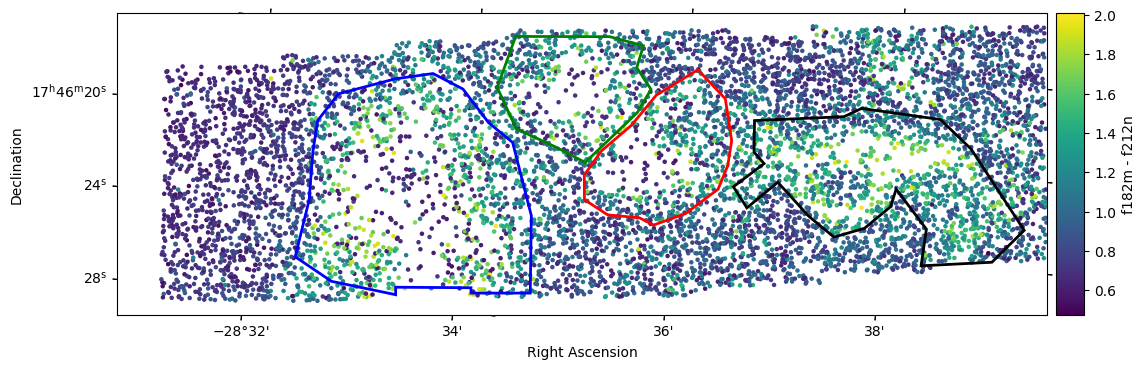

In [15]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ww)
ax.imshow(nanfield)
cat_inbox_lowE.plot_position(s=5, c=cat_inbox_lowE.color('f182m', 'f212n'), cmap='viridis', transform=ax.get_transform('world'))
cax = ax.inset_axes([1.01, 0., 0.03, 1])
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='f182m - f212n')

reg_f[0].to_pixel(ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=2)
reg_c1_ice[0].to_pixel(ww).plot(ax=ax, edgecolor='r', facecolor='none', lw=2)
reg_c2_ice[0].to_pixel(ww).plot(ax=ax, edgecolor='g', facecolor='none', lw=2)
reg_d_ice[0].to_pixel(ww).plot(ax=ax, edgecolor='b', facecolor='none', lw=2)

In [20]:
cat_inbox_f = JWSTCatalog(cat_inbox_lowE.table_region_mask(reg_f, ww))
cat_inbox_c1 = JWSTCatalog(cat_inbox_lowE.table_region_mask(reg_c1_ice, ww))
cat_inbox_c2 = JWSTCatalog(cat_inbox_lowE.table_region_mask(reg_c2_ice, ww))
cat_inbox_d = JWSTCatalog(cat_inbox_lowE.table_region_mask(reg_d_ice, ww))

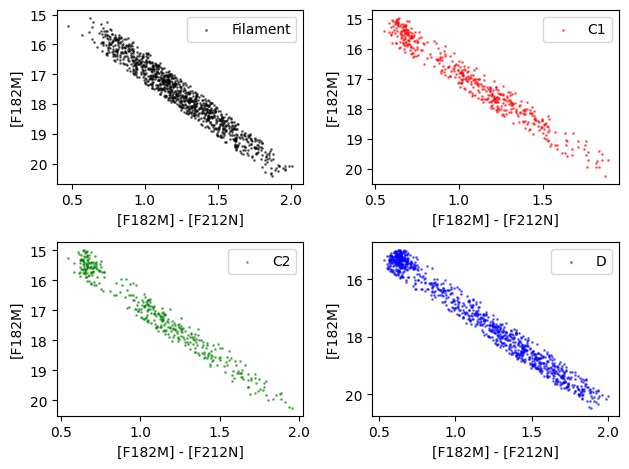

In [25]:
plt.subplot(221)
cat_inbox_f.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.5, color='k', label='Filament')
plt.legend()

plt.subplot(222)
cat_inbox_c1.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.5, color='r', label='C1')
plt.legend()

plt.subplot(223)
cat_inbox_c2.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.5, color='g', label='C2')
plt.legend()

plt.subplot(224)
cat_inbox_d.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.5, color='b', label='D')
plt.legend()

plt.tight_layout()

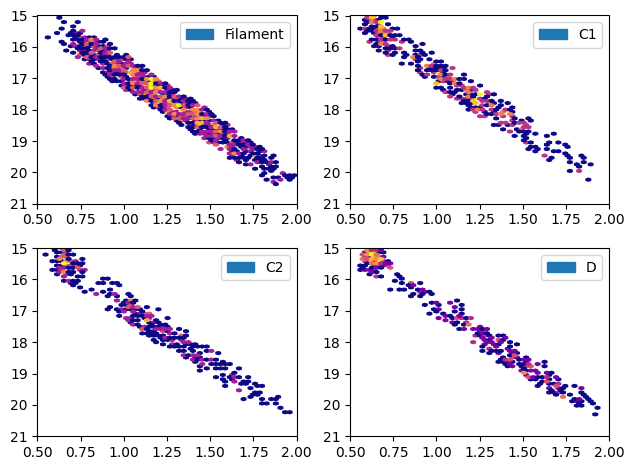

In [49]:
plt.subplot(221)
#cat_inbox_f.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.5, color='k', label='Filament')
plt.hexbin(cat_inbox_f.color('f182m', 'f212n'), cat_inbox_f.band('f182m'), extent=(0, 2, 15, 21), mincnt=1, gridsize=75, cmap='plasma', bins='log', label='Filament')
plt.gca().invert_yaxis()
plt.xlim(0.5, 2)
plt.ylim(21, 15)
plt.legend()

plt.subplot(222)
#cat_inbox_c1.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.5, color='r', label='C1')
plt.hexbin(cat_inbox_c1.color('f182m', 'f212n'), cat_inbox_c1.band('f182m'), extent=(0, 2, 15, 21), mincnt=1, gridsize=75, cmap='plasma', bins='log', label='C1')
plt.gca().invert_yaxis()
plt.xlim(0.5, 2)
plt.ylim(21, 15)
plt.legend()

plt.subplot(223)
#cat_inbox_c2.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.5, color='g', label='C2')
plt.hexbin(cat_inbox_c2.color('f182m', 'f212n'), cat_inbox_c2.band('f182m'), extent=(0, 2, 15, 21), mincnt=1, gridsize=75, cmap='plasma', bins='log', label='C2')
plt.gca().invert_yaxis()
plt.xlim(0.5, 2)
plt.ylim(21, 15)
plt.legend()

plt.subplot(224)
#cat_inbox_d.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.5, color='b', label='D')
plt.hexbin(cat_inbox_d.color('f182m', 'f212n'), cat_inbox_d.band('f182m'), extent=(0, 2, 15, 21), mincnt=2, gridsize=75, cmap='plasma', bins='log', label='D')
plt.gca().invert_yaxis()
plt.xlim(0.5, 2)
plt.ylim(21, 15)
plt.legend()

plt.tight_layout()

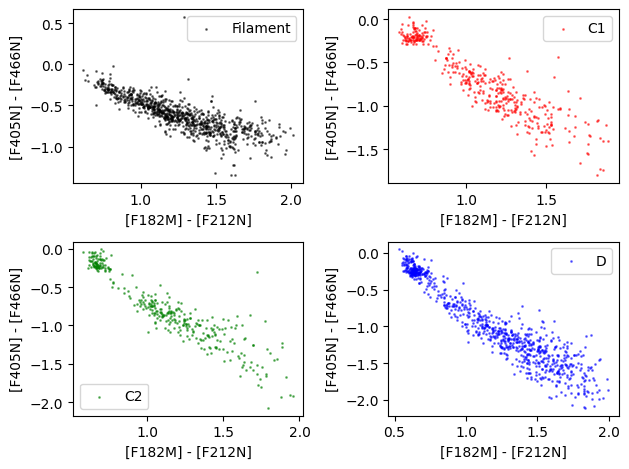

In [53]:
plt.subplot(221)
cat_inbox_f.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', s=1, alpha=0.5, color='k', label='Filament')
plt.legend()

plt.subplot(222)
cat_inbox_c1.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', s=1, alpha=0.5, color='r', label='C1')
plt.legend()

plt.subplot(223)
cat_inbox_c2.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', s=1, alpha=0.5, color='g', label='C2')
plt.legend()

plt.subplot(224)
cat_inbox_d.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', s=1, alpha=0.5, color='b', label='D')
plt.legend()

plt.tight_layout()

## Restricted Regions

In [26]:
reg_c1_restricted = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudc1_restricted.reg')
reg_c2_restricted = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudc2_restricted.reg')
reg_d_restricted = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudd_restricted.reg')


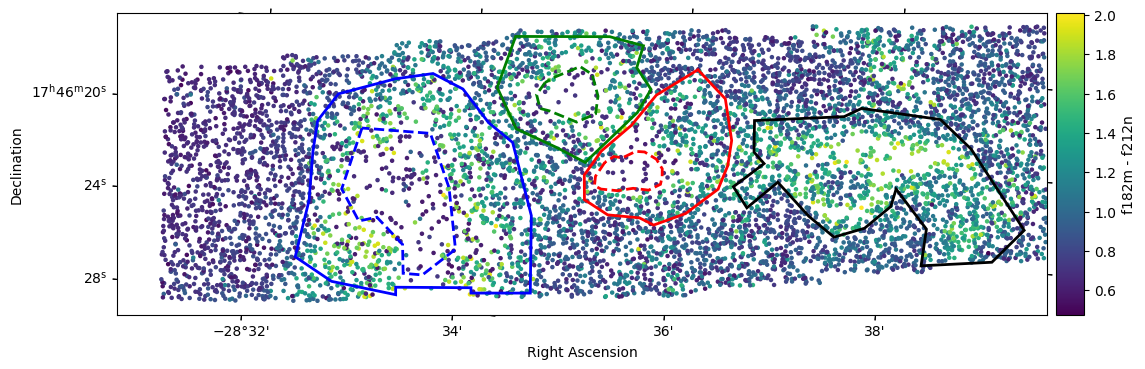

In [32]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ww)
ax.imshow(nanfield)
cat_inbox_lowE.plot_position(s=5, c=cat_inbox_lowE.color('f182m', 'f212n'), cmap='viridis', transform=ax.get_transform('world'))
cax = ax.inset_axes([1.01, 0., 0.03, 1])
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='f182m - f212n')

reg_f[0].to_pixel(ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=2)
reg_c1_ice[0].to_pixel(ww).plot(ax=ax, edgecolor='r', facecolor='none', lw=2)
reg_c2_ice[0].to_pixel(ww).plot(ax=ax, edgecolor='g', facecolor='none', lw=2)
reg_d_ice[0].to_pixel(ww).plot(ax=ax, edgecolor='b', facecolor='none', lw=2)

reg_c1_restricted[0].to_pixel(ww).plot(ax=ax, edgecolor='r', facecolor='none', lw=2, linestyle='dashed')
reg_c2_restricted[0].to_pixel(ww).plot(ax=ax, edgecolor='g', facecolor='none', lw=2, linestyle='dashed')
reg_d_restricted[0].to_pixel(ww).plot(ax=ax, edgecolor='b', facecolor='none', lw=2, linestyle='dashed')

In [27]:
cat_inbox_restricted_c1 = JWSTCatalog(cat_inbox_lowE.table_region_mask(reg_c1_restricted, ww))
cat_inbox_restricted_c2 = JWSTCatalog(cat_inbox_lowE.table_region_mask(reg_c2_restricted, ww))  
cat_inbox_restricted_d = JWSTCatalog(cat_inbox_lowE.table_region_mask(reg_d_restricted, ww))

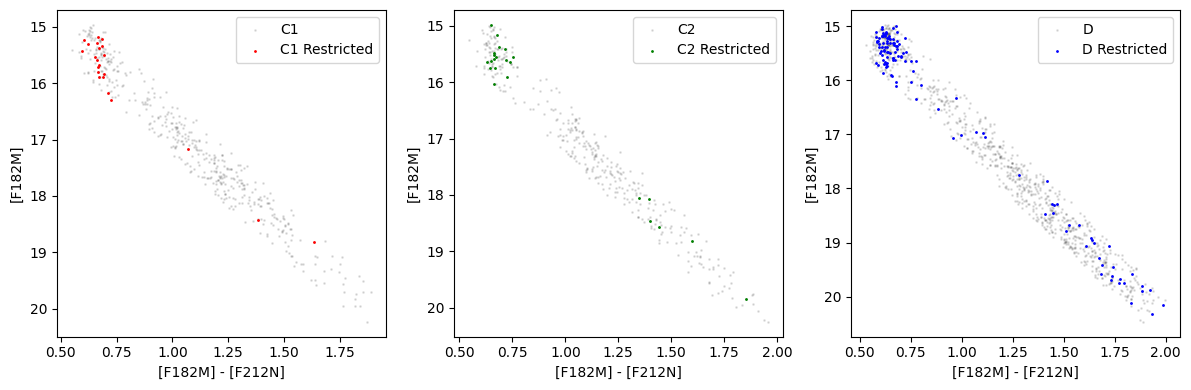

In [31]:
fig = plt.figure(figsize=(12,4))

plt.subplot(131)
cat_inbox_c1.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='k', label='C1')
cat_inbox_restricted_c1.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=1, color='r', label='C1 Restricted')
plt.gca().invert_yaxis()
plt.legend()

plt.subplot(132)
cat_inbox_c2.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='k', label='C2')
cat_inbox_restricted_c2.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=1, color='g', label='C2 Restricted')
plt.gca().invert_yaxis()
plt.legend()

plt.subplot(133)
cat_inbox_d.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='k', label='D')
cat_inbox_restricted_d.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=1, color='b', label='D Restricted')
plt.gca().invert_yaxis()
plt.legend()

plt.tight_layout()